In [1]:
import numpy as np

In [2]:
#Constant parameters in Million eV (MeVs)
a1=15.67
a2=17.23
a3=0.75
a4=93.2

In [3]:
Z=int(input("Enter Atomic Number Z: "))
A=int(input("Enter Mass Number A: "))

Enter Atomic Number Z: 28
Enter Mass Number A: 58


In [4]:
#Fifth parameter
if A%2==1:                 #A is odd
    a5=0       
elif (A%2==0)and(Z%2==0):  #A and Z are both even
    a5=12.0
elif (A%2==0)and(Z%2==1):  #A is even and Z is odd
    a5=-12.0
a5

12.0

### Semi-empirical mass Formula for Nuclear Binding Energy B

$ B = a_1 A-a_2 A^\frac{2}{3}-a_3 \frac{Z^2}{A^\frac{1}{3}} -a_4 \frac{(A-2Z)^2}{A} + \frac{a_5}{A^\frac{1}{2}}$ 

In [5]:
#Binding energy calculation
B= a1*A-a2*A**(2/3)-a3*(Z**2)/(A**(1/3))-a4*((A-2*Z)**2)/(A)+a5/(A**0.5)

In [6]:
print("For the element with atomic number Z =",Z,"and mass number A =",A," ,")
print("Nuclear Binding energy is B=",B)

For the element with atomic number Z = 28 and mass number A = 58  ,
Nuclear Binding energy is B= 493.93560680136824


In [7]:
#Binding energy per nucleon

Bn=B/A
print("Binding energy per nucleon is B/A=",Bn)


Binding energy per nucleon is B/A= 8.516131151747729


### Finding most stable nucleus with given atomic number Z

In [8]:
Z=int(input("Enter the atomic number Z:"))

Enter the atomic number Z:76


In [9]:
Lbn = 0          #largest binding energy
An  = Z          #Respective mass number
for A in np.arange(Z,3*Z,1):
    #Constant parameters in Million eV (MeVs)
    a1=15.67
    a2=17.23
    a3=0.75
    a4=93.2
    #Fifth parameter
    if A%2==1:                 #A is odd
        a5=0       
    elif (A%2==0)and(Z%2==0):  #A and Z are both even
        a5=12.0
    elif (A%2==0)and(Z%2==1):  #A is even and Z is odd
        a5=-12.0
    
    #Binding energy calculation
    B= a1*A-a2*A**(2/3)-a3*(Z**2)/(A**(1/3))-a4*((A-2*Z)**2)/(A)+a5/(A**0.5)
    #Binding energy per nucleon
    Bn=B/A
    #print(A,Bn)
    if Lbn<Bn:
        Lbn=Bn
        An=A

In [10]:
Lbn,An

(7.282904261469813, 158)

In [11]:
print("For given atomic number Z = ",Z)
print("The most stable nuclei is [Z=",Z,",A=",An,"] with binding energy per nucleon",Lbn)

For given atomic number Z =  76
The most stable nuclei is [Z= 76 ,A= 158 ] with binding energy per nucleon 7.282904261469813


## Finding most stable nuclei for all Z from 1 to 100

In [12]:
#Finding maximum binding energy per nucleon for particular Z
def BE(Z):
    Lbn = 0          #largest binding energy
    An  = Z          #Respective mass number
    for A in np.arange(Z,3*Z,1):
        #Constant parameters in Million eV (MeVs)
        a1=15.67
        a2=17.23
        a3=0.75
        a4=93.2
        #Fifth parameter
        if A%2==1:                 #A is odd
            a5=0       
        elif (A%2==0)and(Z%2==0):  #A and Z are both even
            a5=12.0
        elif (A%2==0)and(Z%2==1):  #A is even and Z is odd
            a5=-12.0
    
        #Binding energy calculation
        B= a1*A-a2*A**(2/3)-a3*(Z**2)/(A**(1/3))-a4*((A-2*Z)**2)/(A)+a5/(A**0.5)
        #Binding energy per nucleon
        Bn=B/A
        
        if Lbn<Bn:
            Lbn=Bn
            An=A
    return An,Lbn

In [13]:
BE(92)

(194, 6.7980284984155)

In [14]:
# Finding largest binding energies for each Z
bdata={}
LBE=0         # To store the Largest Binding Energy per nucleon among all elements
LZn=1         # Respective Atomic Number
LAn=1         # Respective Mass Number
print("Z    ","    A","    Largest BE per nucleon")
for Z in np.arange(1,100,1):
    massn,be=BE(Z)
    print(Z,"    ","    ",massn,"    ",be)
    bdata.update({Z:[Z,massn,be]})
    if be>LBE:
        LBE=be
        LZn=Z
        LAn=massn

Z         A     Largest BE per nucleon
1           1      0
2           4      5.843309761445089
3           6      4.752357643495461
4           8      6.835330085889912
5           10      6.42277121416258
6           12      7.450001408063262
7           15      7.2759287595854785
8           16      7.829219179670832
9           19      7.7565457636093065
10           20      8.075065994502456
11           23      8.047741643605248
12           24      8.238691826796318
13           27      8.23400548696845
14           28      8.347948969539557
15           31      8.355316017924503
16           32      8.419299763471765
17           35      8.433300109655088
18           36      8.463130252869773
19           39      8.480797498293386
20           41      8.495784570724105
21           43      8.505969250374267
22           46      8.521126546356417
23           47      8.51427985673783
24           50      8.532622751365931
25           51      8.509541272617627
26           54 

In [15]:
print(LZn,LAn,LBE)

24 50 8.532622751365931


In [16]:
print("Largest binding energy per nucleon occurs at:")
print("Atomic Number Z=",LZn,"Mass number A=",LAn,"with value",LBE)


Largest binding energy per nucleon occurs at:
Atomic Number Z= 24 Mass number A= 50 with value 8.532622751365931


In [20]:
import pandas as pd

In [21]:
bd=pd.DataFrame.from_dict(bdata).T
bd.columns=["Z","A","BE/A"]

[Text(0, 0.5, 'Binding energy per nucleon(MeV)'),
 Text(0.5, 0, 'Atomic number')]

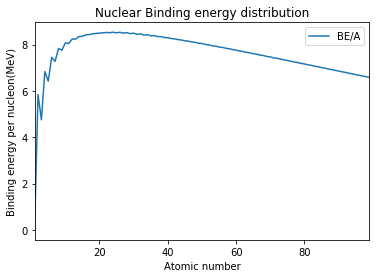

In [22]:
bd.plot(x='Z',y='BE/A',title="Nuclear Binding energy distribution").set(xlabel="Atomic number",\
                                                                ylabel="Binding energy per nucleon(MeV)")

[Text(0, 0.5, 'Binding energy per nucleon(MeV)'),
 Text(0.5, 0, 'Number of nucleons')]

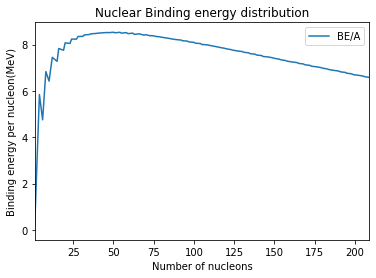

In [23]:
bd.plot(x='A',y='BE/A',title="Nuclear Binding energy distribution").set(xlabel="Number of nucleons",\
                                                                ylabel="Binding energy per nucleon(MeV)")